In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import scipy.stats as stat
import statsmodels.stats.proportion as proportion

In [6]:
def model_comp_pvals(N, frequencies):
    pNull=np.sum(frequencies)/(np.sum(N))
    pFull=frequencies/N
    LikelyNull = np.prod(stat.binom.pmf(frequencies,N,pNull))
    LikelyFull = np.prod(stat.binom.pmf(frequencies,N,pFull))

    chi_sq = -2 * np.log(LikelyNull/LikelyFull)
#     print(chi_sq)
    return chi_sq, 1-stat.chi2.cdf(chi_sq, 3, )   #% goodness of fit for Full vs Null (whehter there are differences between conditions)

#     pEffect=[.75 .75 .75 .25];  #% power to detect three dual state and one single state (87% power with N=15)


In [7]:
single_fits = pd.read_csv('model_results/single_fit_avgerror_results.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)
dual_fits = pd.read_csv('model_results/dual_fit_avgerror_results.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)


In [8]:
pid = 661
dual_fits.loc[dual_fits['p_id'] == pid] 
# single_fits.loc[single_fits['p_id'] == pid]


,p_id,gof,As,Bs,Af,Bf,Eps
20,661,79.444114,0.994821,0.038655,0.0,0.226142,0.273948


In [19]:
single_fits['AIC'] = 2*single_fits['gof']*640 + 2*2
dual_fits['AIC'] = 2*dual_fits['gof']*640 + 2*4

single_fits['BIC'] = 2*single_fits['gof']*640 + np.log(64*7)*2
dual_fits['BIC'] = 2*dual_fits['gof']*640 + np.log(64*7)*4


single_fits['AIC'] = 2*single_fits['gof'] + 2*2
dual_fits['AIC'] = 2*dual_fits['gof'] + 2*4

single_fits['BIC'] = 2*single_fits['gof'] + np.log(64*7)*2
dual_fits['BIC'] = 2*dual_fits['gof'] + np.log(64*7)*4

In [10]:
single_fits.loc[single_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
single_fits.loc[single_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

single_fits.loc[single_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
single_fits.loc[single_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


dual_fits.loc[dual_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
dual_fits.loc[dual_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

dual_fits.loc[dual_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
dual_fits.loc[dual_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


single_fits['Condition'] = single_fits['Rotation'] + ' ' + single_fits['Emphasis']

In [11]:
single_fits['Condition'].value_counts()

Gradual Accuracy    16
Sudden Speed        16
Gradual Speed       15
Sudden Accuracy     15
Name: Condition, dtype: int64

In [17]:
single_fits.loc[single_fits['AIC'] > dual_fits['AIC'], 'Condition'].value_counts()

Gradual Accuracy    13
Sudden Accuracy     12
Sudden Speed         9
Gradual Speed        1
Name: Condition, dtype: int64

In [14]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([13, 9, 12, 1]))

(25.182598448602874, 1.4140924660344112e-05)

In [20]:
single_fits.loc[single_fits['BIC'] > dual_fits['BIC'], 'Condition'].value_counts()

Sudden Accuracy     12
Gradual Accuracy    10
Sudden Speed         9
Gradual Speed        1
Name: Condition, dtype: int64

In [21]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([10, 12, 12, 1]))

(23.390386918256635, 3.348124725410795e-05)

In [120]:
single_fits.loc[(single_fits['gof'].values < dual_fits['gof'].values), 'Condition'].value_counts()


Gradual Speed       3
Sudden Speed        3
Gradual Accuracy    1
Name: Condition, dtype: int64

(array([ 4.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 45., 11.]),
 array([-905.21897665, -792.77483662, -680.33069659, -567.88655657,
        -455.44241654, -342.99827651, -230.55413649, -118.10999646,
          -5.66585643,  106.77828359,  219.22242362]),
 <BarContainer object of 10 artists>)

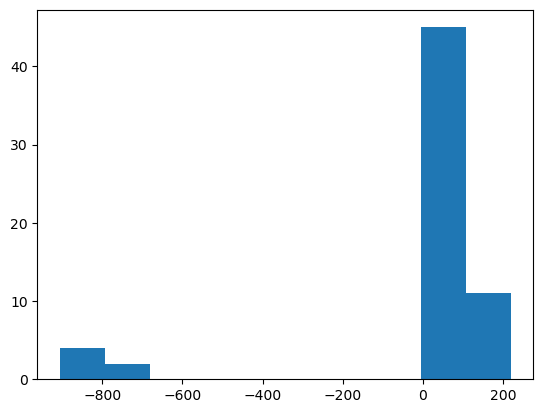

In [22]:
plt.hist(single_fits['gof'].values - dual_fits['gof'].values)

In [24]:
# single_fits['LR_ratio'] = 2* (single_fits['gof'].values - dual_fits['gof'].values)*640
single_fits['LR_ratio'] = 2* (single_fits['gof'].values - dual_fits['gof'].values)*640

In [25]:
single_fits['chi2'] = stat.chi2.sf(single_fits['LR_ratio'], 2)

In [26]:
single_fits.loc[single_fits['chi2'] < 0.05, 'Condition'].value_counts()

Gradual Accuracy    14
Sudden Accuracy     12
Sudden Speed         9
Gradual Speed        4
Name: Condition, dtype: int64

In [27]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([9, 14, 12, 2]))

(22.833940450483855, 4.373274502622593e-05)

# Cross Validation Comparisons

In [28]:
single_fits = pd.read_csv('model_results/single_fit_avgerror_results_cv.csv')
dual_fits = pd.read_csv('model_results/dual_fit_avgerror_results_cv.csv')

single_fits.loc[single_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
single_fits.loc[single_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

single_fits.loc[single_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
single_fits.loc[single_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


dual_fits.loc[dual_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
dual_fits.loc[dual_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

dual_fits.loc[dual_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
dual_fits.loc[dual_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


single_fits['Condition'] = single_fits['Rotation'] + ' ' + single_fits['Emphasis']

In [29]:
dual_fits['dual win'] = (single_fits['test gof'].values > dual_fits['test gof'].values).astype(int)

In [30]:
def compute_wins(dual_fits):
    # Drop column: 'Unnamed: 0'
    # dual_fits = dual_fits.drop(columns=['Unnamed: 0'])
    # Performed 1 aggregation grouped on columns: 'p_id', 'Rotation' and 2 other columns
    dual_fits = dual_fits.groupby(['p_id', 'Rotation', 'Emphasis', 'dual win']).agg(dualwin_count=('dual win', 'count')).reset_index()
    # Filter rows based on column: 'dual win'
    dual_fits = dual_fits[dual_fits['dual win'] == 1]
    return dual_fits

dual_fits_wins = compute_wins(dual_fits.copy())
dual_fits_wins['Condition'] = dual_fits_wins['Rotation'] + ' ' + dual_fits_wins['Emphasis']

In [31]:
dual_fits_wins.loc[dual_fits_wins['dualwin_count'] > 57, 'Condition'].value_counts()

Sudden Accuracy     10
Sudden Speed         9
Gradual Accuracy     4
Name: Condition, dtype: int64

In [32]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([9, 10, 4, 0]))

(21.276588018292927, 9.22304426396181e-05)

(array([  60., 3960., 1351.,  441.,  149.,   96.,   41.,   78.,   19.,
           5.]),
 array([-0.0747763 , -0.01012634,  0.05452362,  0.11917358,  0.18382353,
         0.24847349,  0.31312345,  0.37777341,  0.44242337,  0.50707332,
         0.57172328]),
 <BarContainer object of 10 artists>)

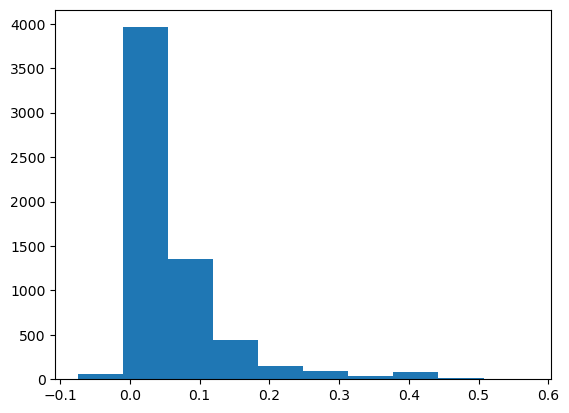

In [106]:
plt.hist(single_fits['gof'].values - dual_fits['gof'].values)

In [322]:
proportion.proportions_chisquare([14, 6, 13, 2], [16, 15, 15, 16])

(26.068430335097002,
 9.227884240020834e-06,
 (array([[14.,  2.],
         [ 6.,  9.],
         [13.,  2.],
         [ 2., 14.]]),
  array([[9.03225806, 6.96774194],
         [8.46774194, 6.53225806],
         [8.46774194, 6.53225806],
         [9.03225806, 6.96774194]])))

2/15

# Assessing Model fits visually

In [245]:
from model_fit_functions import *
df = pd.read_csv('df_allphases.csv')
df = df.loc[df['block no'] > 1].reset_index().drop('index', axis = 1)
df

,p_id,Rotation,Emphasis,phase,trial no,block no,avg errors,init errors,init signed errors
0,641,Gradual,Accuracy,Learning,128,2,0.477032,0.321386,0.321386
1,641,Gradual,Accuracy,Learning,129,2,0.260190,0.263982,0.263982
2,641,Gradual,Accuracy,Learning,130,2,0.515701,2.879004,-2.879004
3,641,Gradual,Accuracy,Learning,131,2,0.341964,0.117537,0.117537
4,641,Gradual,Accuracy,Learning,132,2,0.150074,0.045506,0.045506
...,...,...,...,...,...,...,...,...,...
35707,702,Sudden,Speed,Relearning,699,10,0.402465,1.203681,-1.203681
35708,702,Sudden,Speed,Relearning,700,10,0.827459,0.704598,0.704598
35709,702,Sudden,Speed,Relearning,701,10,0.827459,0.704598,0.704598
35710,702,Sudden,Speed,Relearning,702,10,0.715479,1.933589,1.933589


In [253]:
pid = 662
A = single_fits.loc[single_fits['p_id'] == pid, 'A'].values[0]
B = single_fits.loc[single_fits['p_id'] == pid, 'B'].values[0]
As = dual_fits.loc[dual_fits['p_id'] == pid, 'As'].values[0]
Bs = dual_fits.loc[dual_fits['p_id'] == pid, 'Bs'].values[0]
Af = dual_fits.loc[dual_fits['p_id'] == pid, 'Af'].values[0]
Bf = dual_fits.loc[dual_fits['p_id'] == pid, 'Bf'].values[0]
data = df.loc[df['p_id'] == pid, 'init signed errors'].values

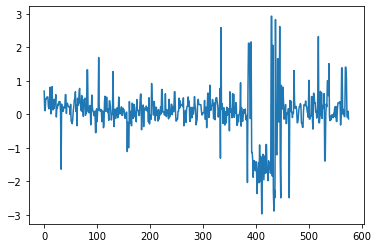

In [258]:
# plt.plot(single_state_model(A, B, len(data), 'Sudden'))
# plt.plot(dual_state_model(As, Bs, Af, Bf, len(data), 'Sudden'))
plt.plot(data)

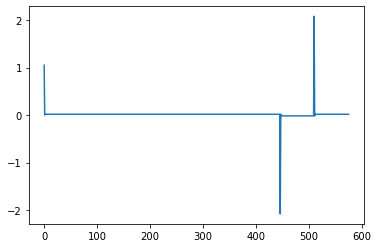

In [262]:
plt.plot(single_state_model(A, B, len(data), 'Sudden'))
